In [1]:
import sys
sys.path.append("../utils")
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
from osgeo import gdal
from imgShow import imgShow
from get_filesPath import get_filesPath


In [2]:
root_dir = os.path.dirname(os.getcwd())
dir_s3l2 = root_dir+'/test_data/s3a-relative-orbit-260&309'
dir_output = root_dir + '/results'


In [3]:
## data prepare
# 1. get files path
files_path = get_filesPath(dir_s3l2, l2_product='enhanced_measurement_subs.nc')
files_path = sorted(files_path)
print('s3l2 files number:', len(files_path))
# files_path


s3l2 files number: 50


## Extract waveform from the s2_l3 product

In [11]:
wf_records = None
for path_s3l2 in files_path:
    print(path_s3l2)
    s3_l2 = xr.open_dataset(path_s3l2)
    wf = s3_l2["waveform_20_ku"]
    for ind in range(1, wf.shape[0], 30):
        if wf_records is None:
            wf_records = wf[ind]
            continue
        wf_records = xr.concat([wf_records, wf[ind]], dim='time_20_ku', coords='all')

wf_records = wf_records.to_dataset(name = 'waveform_20_ku')
# wf_records

/Users/luo/OneDrive/SWOT/Code-algorithms/radar-altimetry-toolbox/test_data/s3a-relative-orbit-260&309/S3A_SR_2_WAT____20190121T021825_20190121T030242_20191218T104655_2657_040_260______MR1_R_NT_004.SEN3/enhanced_measurement_subs.nc
/Users/luo/OneDrive/SWOT/Code-algorithms/radar-altimetry-toolbox/test_data/s3a-relative-orbit-260&309/S3A_SR_2_WAT____20190124T133954_20190124T142746_20191218T110840_2872_040_309______MR1_R_NT_004.SEN3/enhanced_measurement_subs.nc
/Users/luo/OneDrive/SWOT/Code-algorithms/radar-altimetry-toolbox/test_data/s3a-relative-orbit-260&309/S3A_SR_2_WAT____20190217T021826_20190217T030243_20191218T152933_2657_041_260______MR1_R_NT_004.SEN3/enhanced_measurement_subs.nc
/Users/luo/OneDrive/SWOT/Code-algorithms/radar-altimetry-toolbox/test_data/s3a-relative-orbit-260&309/S3A_SR_2_WAT____20190220T133954_20190220T142746_20191218T155226_2872_041_309______MR1_R_NT_004.SEN3/enhanced_measurement_subs.nc
/Users/luo/OneDrive/SWOT/Code-algorithms/radar-altimetry-toolbox/test_data/s

## Visualizing the waveform and labeling by manual 

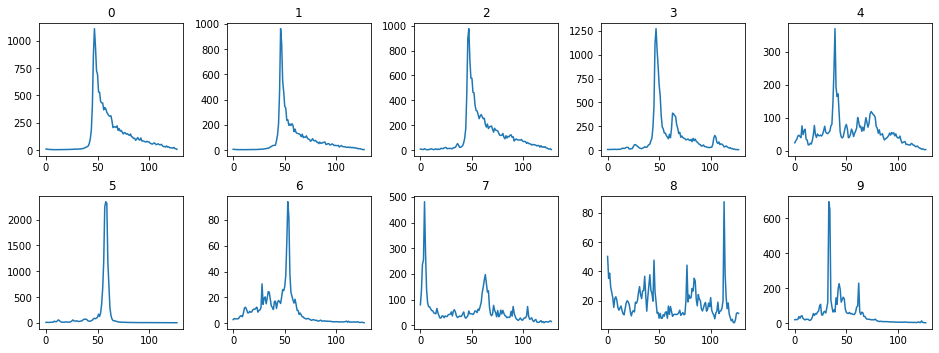

In [96]:
wf_sams = wf_records["waveform_20_ku"]
fig = plt.figure(figsize=(16,12))
i_th = 6
for i,ind in enumerate(range(i_th*10, i_th*10+10)):
    ax = plt.subplot(4,5,i+1)
    ax.plot(wf_sams[ind])
    plt.title(i)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

wf_num =   [0,1,2,3,4,5,6,7,8,9]
wf_cla61 = [1,0,1,0,0,0,0,0,0,0]


## Save the labeled waveform data

In [114]:
# wf_records['waveform_cla'] = (['time_20_ku'], wf_cla)
# wf_records['waveform_cla'].attrs['name'] = 'waveform classification, 1 and 0 represent ocean-like waveform and noisy waveform, respectively'
# wf_records
# path_result = os.path.join(dir_output, 'waveform_dset.nc')
# wf_records.to_netcdf(path=path_result)



<xarray.Dataset>
Dimensions:         (echo_sample_ind: 128, time_20_ku: 610)
Coordinates:
  * time_20_ku      (time_20_ku) datetime64[ns] 2019-01-21T02:37:13.611894144...
    lat_20_ku       (time_20_ku) float64 22.68 22.59 22.5 ... 22.57 22.66 22.74
    lon_20_ku       (time_20_ku) float64 114.3 114.3 114.3 ... 114.2 114.2 114.1
Dimensions without coordinates: echo_sample_ind
Data variables:
    waveform_20_ku  (time_20_ku, echo_sample_ind) float64 213.4 157.6 ... 24.44
    waveform_cla    (time_20_ku) int64 0 0 0 0 0 0 1 1 1 1 ... 0 1 0 0 0 0 0 0 0